## INSERTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
olivetti=fetch_olivetti_faces()

## DECSRIPTION

In [4]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

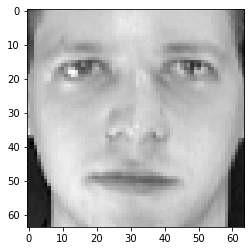

In [6]:
plt.imshow(olivetti.data[0].reshape(64,64),cmap='gray')

The dataset is already scaled between 0 and 1. This is a relatively small dataset hence we use Stratified Sampling instead of the normal train test split to ensure each person has more or less the same pictures in each set.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
train_valid_idx,test_valid_idx=next(strat_split.split(olivetti.data,olivetti.target))
X_train_valid=olivetti.data[train_valid_idx]
y_train_valid=olivetti.target[train_valid_idx]
X_test=olivetti.data[test_valid_idx]
y_test=olivetti.target[test_valid_idx]

In [11]:
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=43)
train_valid_idx,test_valid_idx=next(strat_split.split(X_train_valid,y_train_valid))
X_train=X_train_valid[train_valid_idx]
y_train=y_train_valid[train_valid_idx]
X_val=X_train_valid[test_valid_idx]
y_val=y_train_valid[test_valid_idx]

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(280, 4096)
(80, 4096)
(40, 4096)


## DIMENSIONALITY REDUCTION

In [15]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(0.99)

In [20]:
X_train_pca=pca.fit_transform(X_train)
X_val_pca=pca.transform(X_val)
X_test_pca=pca.transform(X_test)

In [21]:
pca.n_components

0.99

In [51]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [22]:
from sklearn.metrics import silhouette_score

In [23]:
from sklearn.cluster import KMeans

## Calculating ideal no of clusters using silhouette score

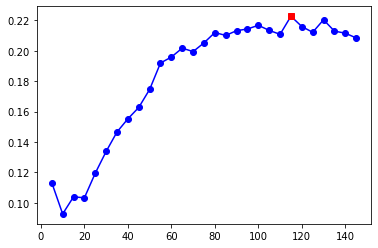

In [55]:
score=np.array([])
for i in range(5,150,5):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_train_pca)
    score=np.append(score,silhouette_score(X_train_pca,kmeans.labels_))
best_index=np.argmax(score)
best_k=[i for i in range(5,150,5)][best_index]
best_sil_score=score[best_index]
plt.plot([i for i in range(5,150,5)],score,'bo-')
plt.plot(best_k,best_sil_score,'rs')

In [56]:
best_k

115

## Calculating no of clusters using inertia

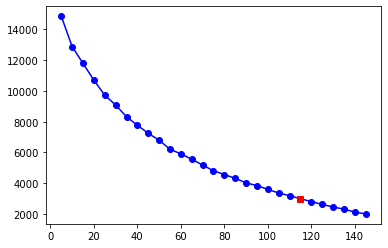

In [57]:
inertia=np.array([])
for i in range(5,150,5):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_train_pca)
    inertia=np.append(inertia,kmeans.inertia_)
plt.plot([i for i in range(5,150,5)],inertia,'bo-')
plt.plot(best_k,inertia[best_index],'rs')

There is no clear value of k for inertia so we will use silhouette score 

In [58]:
best_model=kmeans_per_k[best_index]

Cluster 0


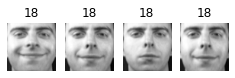

Cluster 1


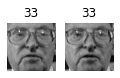

Cluster 2


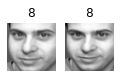

Cluster 3


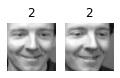

Cluster 4


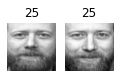

Cluster 5


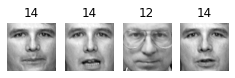

Cluster 6


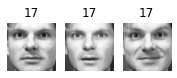

Cluster 7


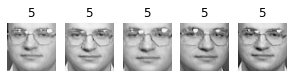

Cluster 8


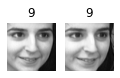

Cluster 9


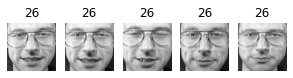

Cluster 10


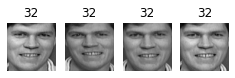

Cluster 11


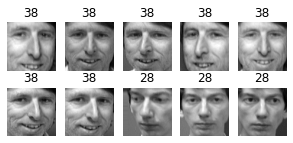

Cluster 12


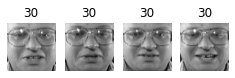

Cluster 13


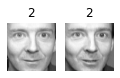

Cluster 14


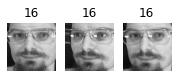

Cluster 15


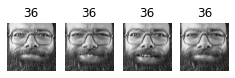

Cluster 16


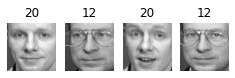

Cluster 17


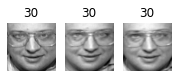

Cluster 18


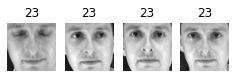

Cluster 19


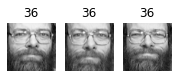

Cluster 20


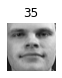

Cluster 21


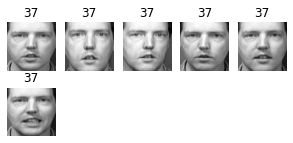

Cluster 22


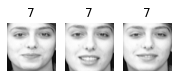

Cluster 23


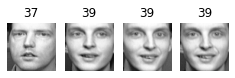

Cluster 24


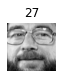

Cluster 25


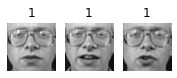

Cluster 26


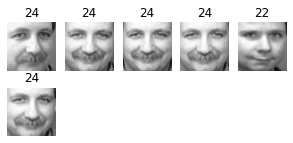

Cluster 27


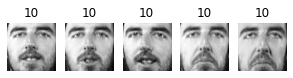

Cluster 28


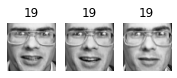

Cluster 29


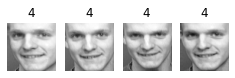

Cluster 30


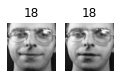

Cluster 31


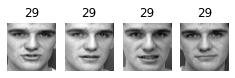

Cluster 32


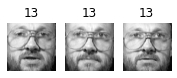

Cluster 33


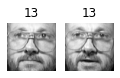

Cluster 34


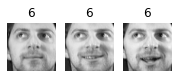

Cluster 35


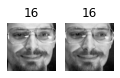

Cluster 36


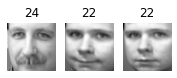

Cluster 37


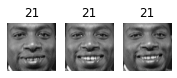

Cluster 38


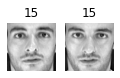

Cluster 39


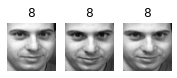

Cluster 40


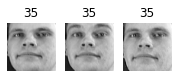

Cluster 41


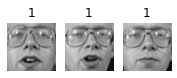

Cluster 42


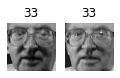

Cluster 43


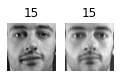

Cluster 44


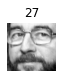

Cluster 45


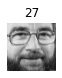

Cluster 46


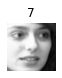

Cluster 47


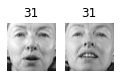

Cluster 48


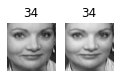

Cluster 49


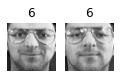

Cluster 50


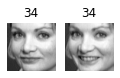

Cluster 51


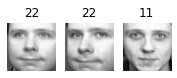

Cluster 52


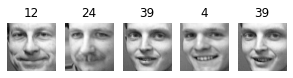

Cluster 53


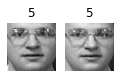

Cluster 54


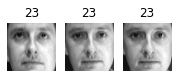

Cluster 55


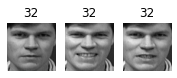

Cluster 56


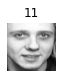

Cluster 57


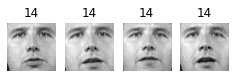

Cluster 58


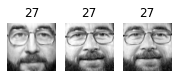

Cluster 59


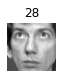

Cluster 60


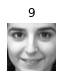

Cluster 61


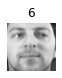

Cluster 62


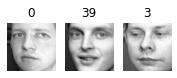

Cluster 63


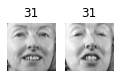

Cluster 64


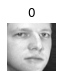

Cluster 65


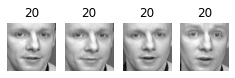

Cluster 66


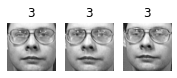

Cluster 67


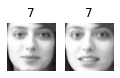

Cluster 68


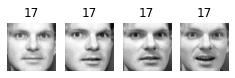

Cluster 69


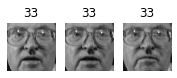

Cluster 70


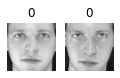

Cluster 71


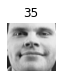

Cluster 72


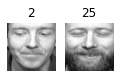

Cluster 73


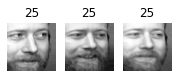

Cluster 74


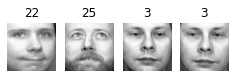

Cluster 75


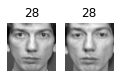

Cluster 76


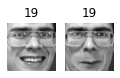

Cluster 77


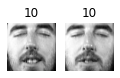

Cluster 78


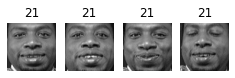

Cluster 79


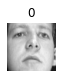

Cluster 80


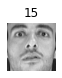

Cluster 81


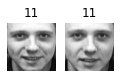

Cluster 82


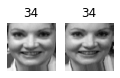

Cluster 83


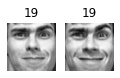

Cluster 84


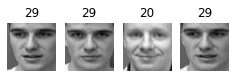

Cluster 85


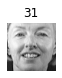

Cluster 86


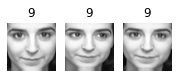

Cluster 87


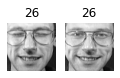

Cluster 88


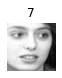

Cluster 89


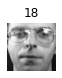

Cluster 90


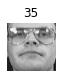

Cluster 91


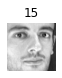

Cluster 92


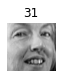

Cluster 93


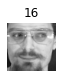

Cluster 94


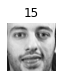

Cluster 95


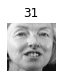

Cluster 96


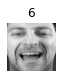

Cluster 97


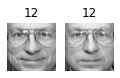

Cluster 98


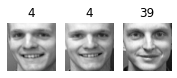

Cluster 99


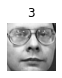

Cluster 100


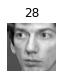

Cluster 101


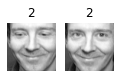

Cluster 102


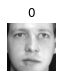

Cluster 103


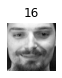

Cluster 104


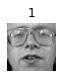

Cluster 105


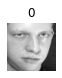

Cluster 106


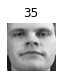

Cluster 107


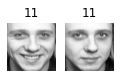

Cluster 108


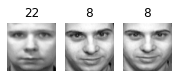

Cluster 109


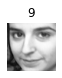

Cluster 110


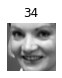

Cluster 111


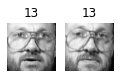

Cluster 112


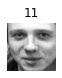

Cluster 113


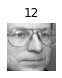

Cluster 114


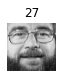

In [59]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Using K_means clustering for preprocessing

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc=RandomForestClassifier(n_estimators=150,random_state=42)
rfc.fit(X_train_pca,y_train)
rfc.score(X_val_pca,y_val)

0.9

 A score of 0.9 not bad!

In [67]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_val,rfc.predict(X_val_pca)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       0.67    

In [71]:
X_train_reduced=best_model.transform(X_train_pca)
X_val_reduced=best_model.transform(X_val_pca)
X_test_reduced=best_model.transform(X_test_pca)

In [72]:
rfc=RandomForestClassifier(n_estimators=150,random_state=42)

In [73]:
rfc.fit(X_train_reduced,y_train)
rfc.score(X_val_reduced,y_val)

0.7375

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
pipe=Pipeline([
    ('kmeans',KMeans()),
('rfc',RandomForestClassifier(n_estimators=150,random_state=42))])

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid={'kmeans__n_clusters':[i for i in range(5,150,5)]}

In [78]:
grid_search=GridSearchCV(pipe,param_grid,verbose=3)

In [79]:
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] kmeans__n_clusters=5 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ kmeans__n_clusters=5, score=0.536, total=   0.5s
[CV] kmeans__n_clusters=5 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................ kmeans__n_clusters=5, score=0.500, total=   0.6s
[CV] kmeans__n_clusters=5 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ................ kmeans__n_clusters=5, score=0.536, total=   0.5s
[CV] kmeans__n_clusters=5 ............................................
[CV] ................ kmeans__n_clusters=5, score=0.518, total=   0.6s
[CV] kmeans__n_clusters=5 ............................................
[CV] ................ kmeans__n_clusters=5, score=0.482, total=   0.5s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............... kmeans__n_clusters=10, score=0.661, total=   0.5s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............... kmeans__n_clusters=10, score=0.536, total=   0.5s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............... kmeans__n_clusters=10, score=0.554, total=   0.6s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............... kmeans__n_clusters=10, score=0.589, total=   0.6s
[CV] kmeans__n_clusters=10 ...........................................
[CV] .

[CV] ............... kmeans__n_clusters=65, score=0.768, total=   1.2s
[CV] kmeans__n_clusters=65 ...........................................
[CV] ............... kmeans__n_clusters=65, score=0.661, total=   1.1s
[CV] kmeans__n_clusters=65 ...........................................
[CV] ............... kmeans__n_clusters=65, score=0.768, total=   1.2s
[CV] kmeans__n_clusters=65 ...........................................
[CV] ............... kmeans__n_clusters=65, score=0.839, total=   1.4s
[CV] kmeans__n_clusters=65 ...........................................
[CV] ............... kmeans__n_clusters=65, score=0.821, total=   1.1s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............... kmeans__n_clusters=70, score=0.804, total=   1.3s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............... kmeans__n_clusters=70, score=0.661, total=   1.1s
[CV] kmeans__n_clusters=70 ...........................................
[CV] .

[CV] .............. kmeans__n_clusters=120, score=0.839, total=   2.3s
[CV] kmeans__n_clusters=120 ..........................................
[CV] .............. kmeans__n_clusters=120, score=0.857, total=   2.0s
[CV] kmeans__n_clusters=125 ..........................................
[CV] .............. kmeans__n_clusters=125, score=0.821, total=   2.1s
[CV] kmeans__n_clusters=125 ..........................................
[CV] .............. kmeans__n_clusters=125, score=0.714, total=   2.4s
[CV] kmeans__n_clusters=125 ..........................................
[CV] .............. kmeans__n_clusters=125, score=0.768, total=   2.0s
[CV] kmeans__n_clusters=125 ..........................................
[CV] .............. kmeans__n_clusters=125, score=0.804, total=   2.0s
[CV] kmeans__n_clusters=125 ..........................................
[CV] .............. kmeans__n_clusters=125, score=0.821, total=   1.9s
[CV] kmeans__n_clusters=130 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:  3.3min finished


GridSearchCV(estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('rfc',
                                        RandomForestClassifier(n_estimators=150,
                                                               random_state=42))]),
             param_grid={'kmeans__n_clusters': [5, 10, 15, 20, 25, 30, 35, 40,
                                                45, 50, 55, 60, 65, 70, 75, 80,
                                                85, 90, 95, 100, 105, 110, 115,
                                                120, 125, 130, 135, 140, 145]},
             verbose=3)

In [80]:
grid_search.best_params_

{'kmeans__n_clusters': 145}

In [82]:
grid_search.score(X_val_pca,y_val)

0.7625

Still not better

Lets extend the features of the pca set and the reduced set

In [91]:
X_train_extend=np.c_[X_train_pca,X_train_reduced]
X_val_extend=np.c_[X_val_pca,X_val_reduced]
X_test_extend=np.c_[X_test_pca,X_test_reduced]

In [92]:
rfc=RandomForestClassifier(n_estimators=150,random_state=42)

In [93]:
rfc.fit(X_train_extend,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [94]:
print(rfc.score(X_val_extend,y_val))

0.8125


That's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

In [95]:
from sklearn.mixture import GaussianMixture

In [96]:
gm=GaussianMixture(n_components=40,random_state=42)

In [97]:
y_pred=gm.fit_predict(X_train_pca)

In [99]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

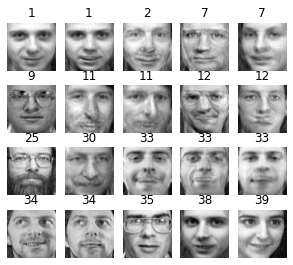

In [100]:
plot_faces(gen_faces, y_gen_faces)

CONCLUSION- We achieved an accuracy of 90 percent which is good for such a small dataset. We used many techniques such as K-MEANS clustering, PCA, preprocessing using K-Means with Random Forest as classifier.